In [2]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

In [3]:
df = pd.read_csv("t-shirts.csv")


In [4]:
df.head(5)

,size,material,color,sleeves,demand
0,S,nylon,white,long,medium
1,XL,polyester,cream,short,high
2,S,silk,blue,short,medium
3,M,cotton,black,short,medium
4,XL,polyester,orange,long,medium


In [5]:
df.dtypes

size        object
material    object
color       object
sleeves     object
demand      object
dtype: object

In [6]:
df.describe()

,size,material,color,sleeves,demand
count,20000,20000,20000,20000,20000
unique,7,5,10,2,3
top,L,nylon,white,long,high
freq,4408,5652,3286,10117,8965


In [7]:
for column in df.columns:
    print(f"Unique values in {column}: {df[column].nunique()}")

Unique values in size: 7
Unique values in material: 5
Unique values in color: 10
Unique values in sleeves: 2
Unique values in demand: 3


In [8]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"{column}: {unique_values}")

size: ['S' 'XL' 'M' 'XS' 'XXL' 'L' '3XL']
material: ['nylon' 'polyester' 'silk' 'cotton' 'linen']
color: ['white' 'cream' 'blue' 'black' 'orange' 'green' 'yellow' 'red' 'violet'
 'navy']
sleeves: ['long' 'short']
demand: ['medium' 'high' 'low']


## Based on this : size, demand and sleeves can be changed to numerical values. Theoretically also color if order it in specific order

In [9]:
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

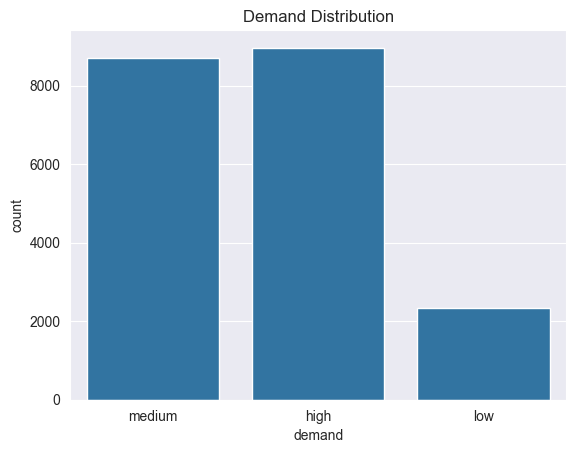

In [10]:
sns.countplot(x='demand', data=df)
plt.title('Demand Distribution')
plt.show()

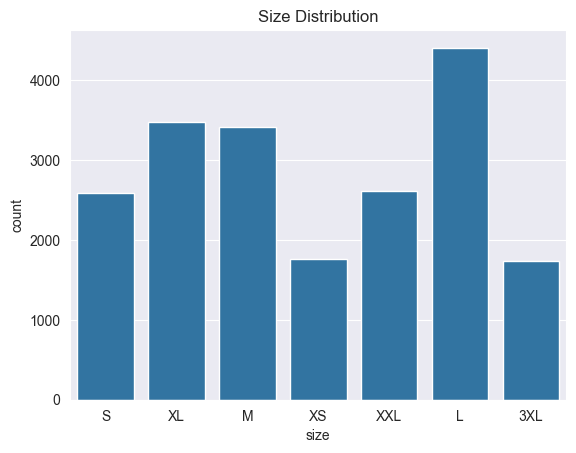

In [11]:
sns.countplot(x='size', data=df)
plt.title('Size Distribution')
plt.show()

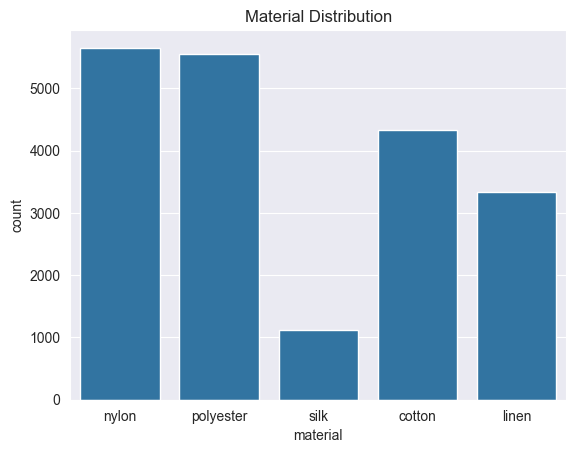

In [12]:
sns.countplot(x='material', data=df)
plt.title('Material Distribution')
plt.show()

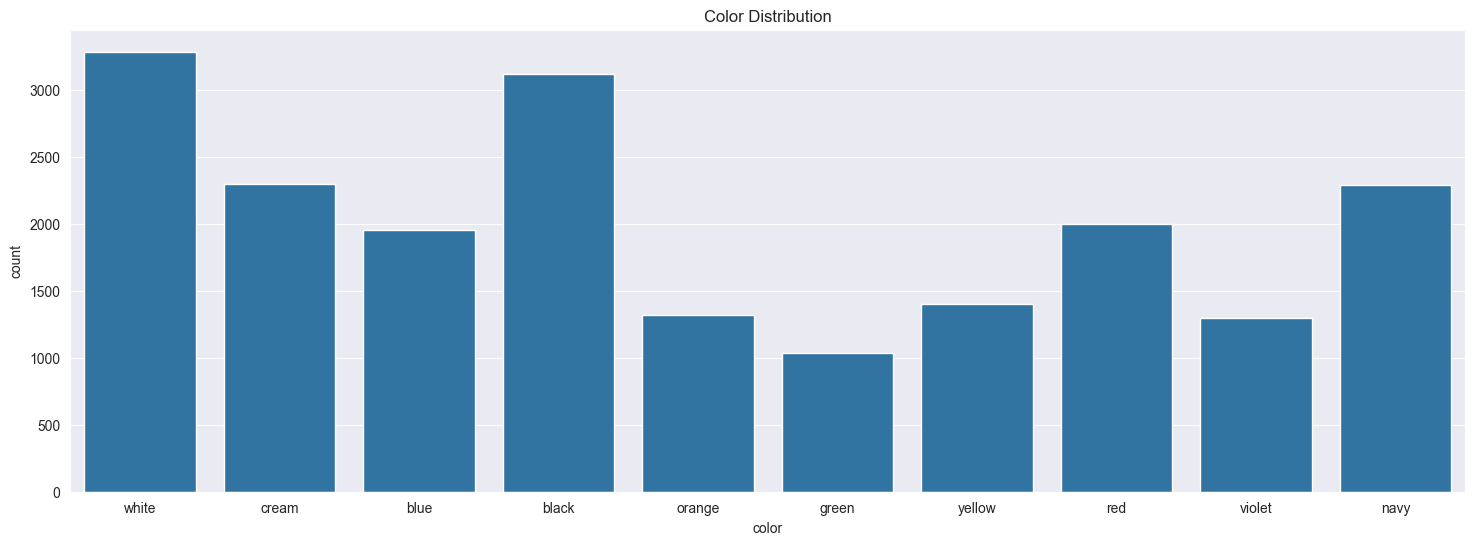

In [13]:
plt.figure(figsize=(18, 6))
sns.countplot(x='color', data=df)
plt.title('Color Distribution')
plt.show()

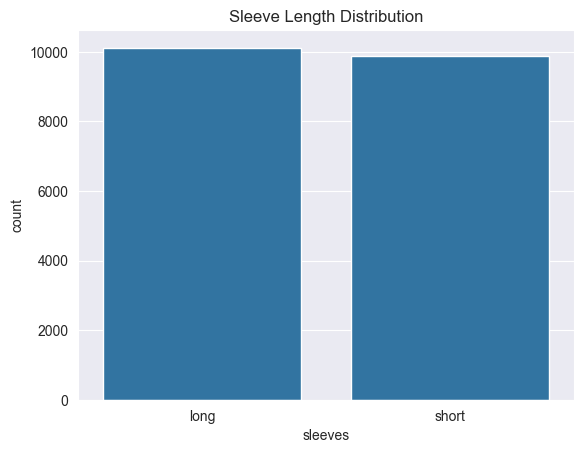

In [14]:
sns.countplot(x='sleeves', data=df)
plt.title('Sleeve Length Distribution')
plt.show()

In [15]:
df.isnull().sum()


size        0
material    0
color       0
sleeves     0
demand      0
dtype: int64

In [16]:
(df == '').sum()

size        0
material    0
color       0
sleeves     0
demand      0
dtype: int64

# SO THERE IS NO MISSING VALUES HERE

In [17]:
df_processed = df.copy()

In [18]:
ordinal_encoder = OrdinalEncoder(categories=[['XS', 'S', 'M', 'L', 'XL', 'XXL', '3XL']])
df_processed['size'] = ordinal_encoder.fit_transform(df_processed[['size']])



In [19]:
ordinal_encoder = OrdinalEncoder(categories=[['long','short']])
df_processed['sleeves'] = ordinal_encoder.fit_transform(df_processed[['sleeves']])


In [20]:
ordinal_encoder = OrdinalEncoder(categories=[['low','medium','high']])
df_processed['demand'] = ordinal_encoder.fit_transform(df_processed[['demand']])


In [21]:
# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)


In [22]:

# Perform one-hot encoding on the 'color' column
encoded_colors = encoder.fit_transform(df_processed[['color']])
encoded_colors_df = pd.DataFrame(encoded_colors, columns=encoder.get_feature_names_out(['color']))


In [23]:
# Perform one-hot encoding on the 'material' column
encoded_materials = encoder.fit_transform(df_processed[['material']])
encoded_materials_df = pd.DataFrame(encoded_materials, columns=encoder.get_feature_names_out(['material']))


In [24]:
# Concatenate the encoded columns back to the original DataFrame
df_processed = pd.concat([df_processed, encoded_colors_df, encoded_materials_df], axis=1).drop(['color', 'material'], axis=1)


In [25]:
df_processed.head()

,size,sleeves,demand,color_black,color_blue,color_cream,color_green,color_navy,color_orange,color_red,color_violet,color_white,color_yellow,material_cotton,material_linen,material_nylon,material_polyester,material_silk
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,4.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# DONE DATA PREPROCESSING

The validation set is a set of data, separate from the training set, that is used to validate our model performance during training.

This validation process gives information that helps us tune the model’s hyperparameters and configurations accordingly. It is like a critic telling us whether the training is moving in the right direction or not.

The model is trained on the training set, and, simultaneously, the model evaluation is performed on the validation set after every epoch.

The main idea of splitting the dataset into a validation set is to prevent our model from overfitting i.e., the model becomes really good at classifying the samples in the training set but cannot generalize and make accurate classifications on the data it has not seen before. 

Metrics:
Precision: The ratio of correctly predicted positive observations to the total predicted positives. It tells us what proportion of predicted positives is actually correct.


 
Recall: The ratio of correctly predicted positive observations to all observations in the actual class. It tells us what proportion of actual positives is correctly identified.


 
F1-Score: The weighted average of Precision and Recall. It seeks a balance between precision and recall.

Support: The number of actual occurrences of the class in the dataset.

Classes:
The output shows metrics for three classes (0.0, 1.0, 2.0). Each class likely corresponds to different levels of demand (e.g., low, medium, high).
Interpretation:
Class 0.0:

Precision: 0.95 (95% of predictions for class 0.0 are correct)
Recall: 0.94 (94% of actual class 0.0 instances are correctly predicted)
F1-Score: 0.95 (harmonic mean of precision and recall)
Support: 456 (there are 456 instances of class 0.0 in the validation set)
Class 1.0:

Precision: 0.97 (97% of predictions for class 1.0 are correct)
Recall: 0.97 (97% of actual class 1.0 instances are correctly predicted)
F1-Score: 0.97 (harmonic mean of precision and recall)
Support: 1749 (there are 1749 instances of class 1.0 in the validation set)
Class 2.0:

Precision: 0.98 (98% of predictions for class 2.0 are correct)
Recall: 0.98 (98% of actual class 2.0 instances are correctly predicted)
F1-Score: 0.98 (harmonic mean of precision and recall)
Support: 1795 (there are 1795 instances of class 2.0 in the validation set)
Overall Metrics:
Accuracy: The ratio of correctly predicted instances to the total instances. Here, it's 0.97, meaning the model is 97% accurate.
Macro Average: The average of the precision, recall, and F1-score for all classes, treating all classes equally.
Precision: 0.97
Recall: 0.96
F1-Score: 0.97
Weighted Average: The average of the precision, recall, and F1-score, weighted by the number of instances in each class (support).
Precision: 0.97
Recall: 0.97
F1-Score: 0.97

In [26]:
def train_evaluate(X_train, y_train, X_val, y_val):
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    print(classification_report(y_val, y_pred))

# Check on original data

In [27]:
# Separate features and target
X = df_processed.drop('demand', axis=1)
y = df_processed['demand']

In [28]:
# Split the data into training and testing datasets
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the temporary set into training and validation datasets
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)


In [29]:
train_evaluate(X_train, y_train, X_val, y_val)

              precision    recall  f1-score   support

         0.0       0.95      0.94      0.95       456
         1.0       0.97      0.97      0.97      1749
         2.0       0.98      0.98      0.98      1795

    accuracy                           0.97      4000
   macro avg       0.97      0.96      0.97      4000
weighted avg       0.97      0.97      0.97      4000


In [30]:
train_evaluate(X_train, y_train, X_test,y_test)

              precision    recall  f1-score   support

         0.0       0.96      0.92      0.94       457
         1.0       0.96      0.98      0.97      1740
         2.0       0.99      0.98      0.98      1803

    accuracy                           0.97      4000
   macro avg       0.97      0.96      0.97      4000
weighted avg       0.97      0.97      0.97      4000


In [31]:
print("Training set shape:", X_train.shape, y_train.shape)

Training set shape: (12000, 17) (12000,)


In [32]:
print("Testing set shape:", X_test.shape, y_test.shape)

Testing set shape: (4000, 17) (4000,)


# Check on processed data

In [33]:
# Separate features and target
X_processed = df_processed.drop('demand', axis=1)
y_processed = df_processed['demand']

In [34]:
scaler_minmax = MinMaxScaler()
X_train_minmax = scaler_minmax.fit_transform(X_processed)

In [35]:
X_train_minmax

array([[0.16666667, 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.66666667, 1.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.16666667, 1.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.83333333, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.5       , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.66666667, 1.        , 0.        , ..., 1.        , 0.        ,
        0.        ]])

In [36]:
# Split the data into training and testing datasets
X_temp, X_test, y_temp, y_test = train_test_split(X_train_minmax, y_processed, test_size=0.2, random_state=42)

# Further split the temporary set into training and validation datasets
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)


In [37]:
train_evaluate(X_train, y_train, X_val, y_val)

              precision    recall  f1-score   support

         0.0       0.95      0.94      0.95       456
         1.0       0.97      0.97      0.97      1749
         2.0       0.98      0.98      0.98      1795

    accuracy                           0.97      4000
   macro avg       0.97      0.96      0.97      4000
weighted avg       0.97      0.97      0.97      4000


In [38]:
train_evaluate(X_train, y_train, X_test,y_test)

              precision    recall  f1-score   support

         0.0       0.96      0.92      0.94       457
         1.0       0.96      0.98      0.97      1740
         2.0       0.99      0.98      0.98      1803

    accuracy                           0.97      4000
   macro avg       0.97      0.96      0.97      4000
weighted avg       0.97      0.97      0.97      4000


### So basically what it will do in this case it will transform only size since the rest of the values in already have got values between 0 and 1

### Bonus - remove 5% of the feature values and prepare the data using methods that deal with missing data. (5 points)


In [39]:
df_copy = df_processed.copy()
np.random.seed(0)  # For reproducibility
missing_rate = 0.05
missing_indices = np.random.choice(df_copy.index, size=int(missing_rate * len(df_copy)), replace=False)
df_copy.loc[missing_indices, 'size'] = np.nan


In [40]:
df_copy.isnull().sum()

size                  1000
sleeves                  0
demand                   0
color_black              0
color_blue               0
color_cream              0
color_green              0
color_navy               0
color_orange             0
color_red                0
color_violet             0
color_white              0
color_yellow             0
material_cotton          0
material_linen           0
material_nylon           0
material_polyester       0
material_silk            0
dtype: int64

In [41]:
mean_imputer = SimpleImputer(strategy='mean')
df_copy['size'] = mean_imputer.fit_transform(df_copy[['size']])


In [43]:
median_imputer = SimpleImputer(strategy='median')
df_copy['size'] = median_imputer.fit_transform(df_copy[['size']])

In [46]:
mode_imputer = SimpleImputer(strategy='most_frequent')
df_copy['size'] = mode_imputer.fit_transform(df_copy[['size']])

# Classification evaluations

In [42]:
# Separate features and target
X = df_processed.drop('demand', axis=1)
y = df_processed['demand']

# Split the data into training and testing datasets
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the temporary set into training and validation datasets
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)



# Naive Bayes (with Grid Search CV)

In [53]:


param_grid_gnb = {
    'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 1e-04, 1e-03, 1e-02, 1e-01, 1.0]
}

gnb = GaussianNB()

# Perform GridSearchCV
grid_search_gnb = GridSearchCV(estimator=gnb, param_grid=param_grid_gnb, cv=5, scoring='accuracy')
grid_search_gnb.fit(X_train, y_train)

# Best hyperparameters and corresponding score
print("Best Hyperparameters for Gaussian Naive Bayes:")
print(grid_search_gnb.best_params_)
print("Best Cross-validation Accuracy:", grid_search_gnb.best_score_)


Best Hyperparameters for Gaussian Naive Bayes:
{'var_smoothing': 0.1}
Best Cross-validation Accuracy: 0.7829166666666667


# Decision Tree

In [49]:


# Set of hyperparameters to test
hyperparameters = [
    {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2},
    {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 4},
    {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 10}
]

for params in hyperparameters:
    # Initialize the classifier with the current hyperparameters
    dt = DecisionTreeClassifier(**params)
    
    # Fit the model
    dt.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred_dt = dt.predict(X_test)
    
    # Evaluate the model
    print(f"Decision Tree Classifier with parameters: {params}")
    print("Accuracy:", accuracy_score(y_test, y_pred_dt))
    print("Classification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Classifier with parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2}
Accuracy: 0.97425
Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.93      0.95       457
         1.0       0.97      0.98      0.97      1740
         2.0       0.99      0.98      0.98      1803

    accuracy                           0.97      4000
   macro avg       0.97      0.96      0.97      4000
weighted avg       0.97      0.97      0.97      4000

Decision Tree Classifier with parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 4}
Accuracy: 0.954
Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.88      0.92       457
         1.0       0.95      0.94      0.95      1740
         2.0       0.96      0.98      0.97      1803

    accuracy                           0.95      4000
   macro avg       0.95      0.93      0.94      4

# Random Forest

In [54]:

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the classifier
rf = RandomForestClassifier(random_state=42)

# Perform GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

# Best hyperparameters and corresponding score
print("\nBest Hyperparameters for Random Forest:")
print(grid_search_rf.best_params_)
print("Best Cross-validation Accuracy:", grid_search_rf.best_score_)

# Predict on the test set with the best estimator
best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)

# Evaluate the model
print("\nRandom Forest Classifier with Best Hyperparameters")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))



Best Hyperparameters for Random Forest:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Best Cross-validation Accuracy: 0.9706666666666667

Random Forest Classifier with Best Hyperparameters
Accuracy: 0.973
Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.92      0.94       457
         1.0       0.96      0.98      0.97      1740
         2.0       0.99      0.98      0.98      1803

    accuracy                           0.97      4000
   macro avg       0.97      0.96      0.97      4000
weighted avg       0.97      0.97      0.97      4000


# Support vector machine

In [43]:
from sklearn.svm import SVC

# Define the parameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

# Initialize the classifier
svm = SVC(random_state=42)

# Perform GridSearchCV
grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)

# Best hyperparameters and corresponding score
print("\nBest Hyperparameters for SVM:")
print(grid_search_svm.best_params_)
print("Best Cross-validation Accuracy:", grid_search_svm.best_score_)

# Predict on the test set with the best estimator
best_svm = grid_search_svm.best_estimator_
y_pred_svm = best_svm.predict(X_test)

# Evaluate the model
print("\nSVM Classifier with Best Hyperparameters")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))



Best Hyperparameters for SVM:
{'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
Best Cross-validation Accuracy: 0.9631666666666667

SVM Classifier with Best Hyperparameters
Accuracy: 0.9675
Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.90      0.93       457
         1.0       0.95      0.97      0.96      1740
         2.0       0.98      0.98      0.98      1803

    accuracy                           0.97      4000
   macro avg       0.97      0.95      0.96      4000
weighted avg       0.97      0.97      0.97      4000
